The following code details Linear regression examples using least squares and maximal likelihood. For least squares we must first define an objective funciton in the form that scipys optimize function can process, as well as create some fake data with normally distributed noise. We solve for the model $$y = b + m*x + \epsilon$$ In order to do this we need to minimize the least squares error by finding an optimal m and b for the equation below.  $$e = \sum_{i=1}^{n}(y_i - (m*x_i +b))^2$$

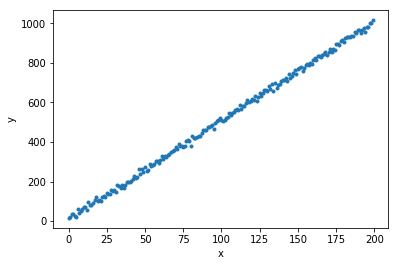

In [21]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def objective_function(B, X):
    m = B[0]
    b = B[1]
    res = np.sum((X[:, 1] - (m*X[:,0] + b))**2)
    return res

n = 200
x = np.arange(n)
noise  = np.random.randn(n)*10
m = 5
b = 10

y = m*x + b + noise
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, '.')
plt.show()





4.997744874977445 10.869895650945763


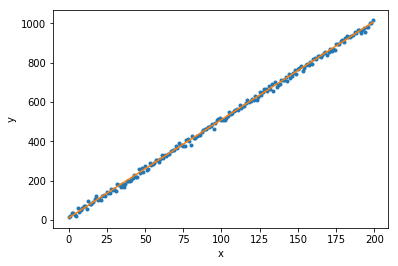

In [27]:
from scipy.optimize import minimize
X = np.concatenate((x.reshape(-1, 1), y.reshape(-1 ,1)), 1)
res = minimize(objective_function, x0 = np.array([1,3]), args=X)
mfit, bfit = res.x[0], res.x[1]
print(mfit,bfit)
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, '.')
plt.plot(x, mfit * x + bfit, '-')
plt.show()

Now we move on to finding a model by maximizing likelihood. In this representation each observation has an associated probability density function
$$ P = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$ Taking into account all observations this becomes
$$ L = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} $$ Instead of distance from the average we look at the actual observation, y. It is also simpler to work with the log likelihood: $$\log(L) = \sum_{i=1}^{n}\log(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} )$$ which simplifies to
$$\log(L)= - \frac { n } { 2 } \log 2 \pi - n \log \sigma - \frac { 1 } { 2 s ^ { 2 } } \sum _ { i = 1 } ^ { n } \left( \mu - x _ { i }  \right) ^ { 2 }$$

Substituting in the observed value for a linear model recovers our original least squares regression objective funciton.

$$\log(L)= - \frac { n } { 2 } \log 2 \pi - n \log \sigma - \frac { 1 } { 2 \sigma ^ { 2 } } \sum _ { i = 1 } ^ { n } \left( y_i - \left(  m x _ { i } + b \right)  \right) ^ { 2 }$$